In [1]:
from clip2latent.models import Clip2StyleGAN
from PIL import Image
import torch

/home/jpinkney/miniconda3/envs/clip2latent/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = Clip2StyleGAN("best.yaml", device="cuda:7", checkpoint="best.ckpt")

In [3]:

def trunc_pair(inp, truncs=(1, 0.8)):
    ims = []
    for t in truncs:
        with torch.no_grad():
            torch.manual_seed(0)
            out = model(inp, skips=200, cond_scale=3, truncation=t)
        im = (0.5*out[0][0].permute(1,2,0).detach().cpu() + 0.5).clamp(0,1)
        im = (255*im).to(torch.uint8).numpy()

        ims.append(Image.fromarray(im))
    return ims

sampling loop time step: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 40.43it/s]

Setting up PyTorch plugin "bias_act_plugin"... 

Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


sampling loop time step: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 41.52it/s]


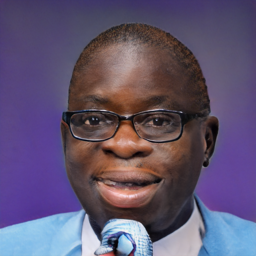

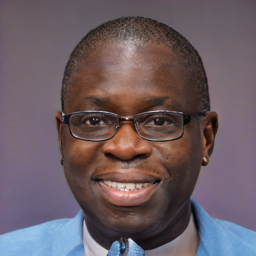

sampling loop time step: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 41.85it/s]


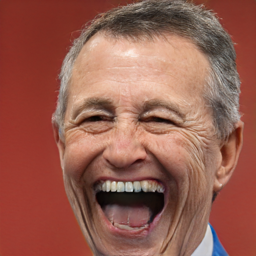

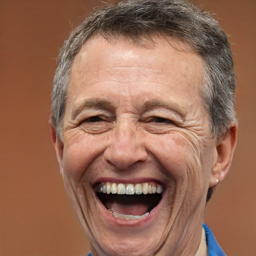

sampling loop time step: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 41.91it/s]


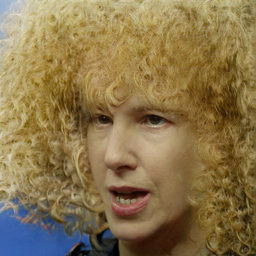

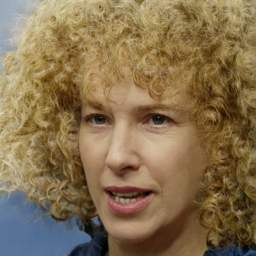

In [4]:
inps = [
    "A photo of a Nigerian professor of economics",
    "A photo of a british politician laughing happily",
    "A photo of a person with very tight curly blonde hair",
]
for inp in inps:
    orig, trunc = trunc_pair(inp)
    orig.save(f"figures/{inp.replace(' ', '-')}-orig.png")
    trunc.save(f"figures/{inp.replace(' ', '-')}-trunc0.8.png")
    display(orig.resize((256, 256)))
    display(trunc.resize((256, 256)))